# Job and Deferred output

In [1]:
from jobflow import job

/opt/homebrew/anaconda3/envs/myenv/lib/python3.11/site-packages/maggma/utils.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
def usual_add(a, b):
    return a + b

In [3]:
usual_add(1,2)

3

In [4]:
@job
def add(a, b):
    return a + b

In [5]:
add(1, 2)

Job(name='add', uuid='8529abd9-c531-4042-8c1f-aee07975c743')

In [6]:
add_job = add(1, 2)
print(add_job)
print(add_job.uuid)
print(add_job.index)

Job(name='add', uuid='8375e24e-a597-41d0-a5ad-f296382a020b')
8375e24e-a597-41d0-a5ad-f296382a020b
1


# Job Store

In [7]:
from jobflow import job, SETTINGS
store = SETTINGS.JOB_STORE
store.connect()

@job
def add(a, b):
    return a + b

add_job = add(1, 2)
add_job.run(store=store)

Response(output=3, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False)

# Flow

In [8]:
from jobflow import job, Flow

In [9]:
@job
def add(a,b):
    return a + b

In [10]:
@job
def multiply(a,b):
    return a * b

In [12]:
add_job = add(1,2)
multiply_job = multiply(add_job.output, 3)

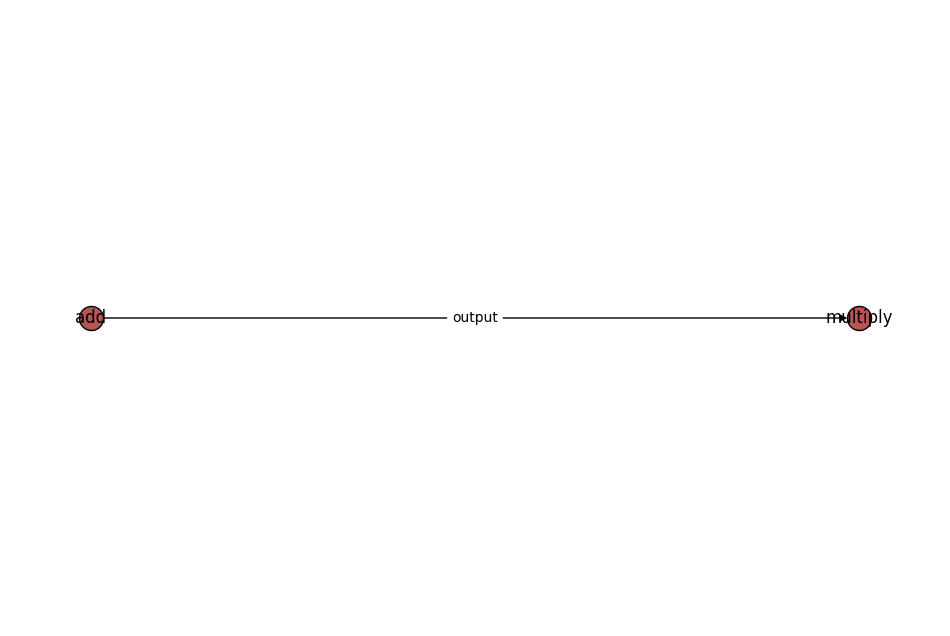

In [13]:
flow = Flow([add_job, multiply_job])
flow.draw_graph().show()

In [15]:
add_job_1 = add(1,2)
multiply_job_1 = multiply(add_job.output, 3)
add_job_2 = add(multiply_job_1.output, add_job_1.output)
multiply_job_2 = multiply(add_job_2.output, multiply_job_1.output)

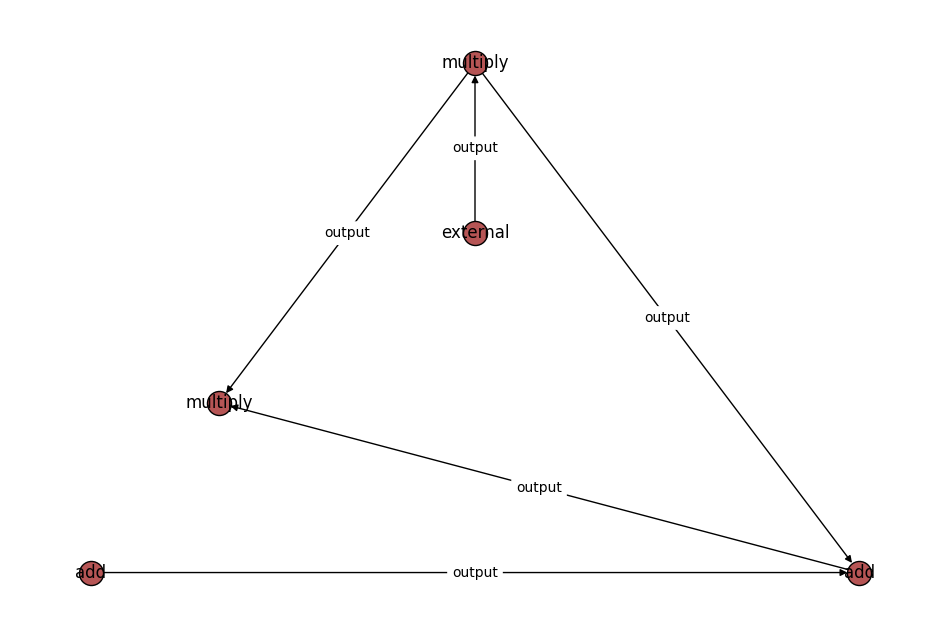

In [17]:
flow = Flow([add_job_1, add_job_2, multiply_job_1, multiply_job_2])
flow.draw_graph().show()

# run_locally

In [18]:
from jobflow import job, run_locally

@job
def add(a, b):
    return a + b

add_job = add(1, 2)
output = run_locally(add_job)
print(output)

2023-10-07 11:31:28,246 INFO Started executing jobs locally
2023-10-07 11:31:28,248 INFO Starting job - add (9a17e891-f01c-4a48-a786-f6ed91cfb686)
2023-10-07 11:31:28,249 INFO Finished job - add (9a17e891-f01c-4a48-a786-f6ed91cfb686)
2023-10-07 11:31:28,250 INFO Finished executing jobs locally
{'9a17e891-f01c-4a48-a786-f6ed91cfb686': {1: Response(output=3, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False)}}


In [19]:
from jobflow import job, Flow, run_locally

@job
def add(a, b):
    return a + b

@job
def multiply(a, b):
    return a * b

add_job = add(1, 2)
multiply_job = multiply(add_job.output, 3)

flow = Flow([add_job, multiply_job])
output = run_locally(flow)
print(output)

2023-10-07 11:31:47,690 INFO Started executing jobs locally
2023-10-07 11:31:47,692 INFO Starting job - add (7ba05c22-3a89-44df-a503-85cbe42c18db)
2023-10-07 11:31:47,694 INFO Finished job - add (7ba05c22-3a89-44df-a503-85cbe42c18db)
2023-10-07 11:31:47,695 INFO Starting job - multiply (0db81341-e00a-4ff5-a3e9-ee42e4b1032d)
2023-10-07 11:31:47,697 INFO Finished job - multiply (0db81341-e00a-4ff5-a3e9-ee42e4b1032d)
2023-10-07 11:31:47,697 INFO Finished executing jobs locally
{'7ba05c22-3a89-44df-a503-85cbe42c18db': {1: Response(output=3, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False)}, '0db81341-e00a-4ff5-a3e9-ee42e4b1032d': {1: Response(output=9, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False)}}


# Running in the same folder

In [20]:
from jobflow import job, Flow, run_locally
from pathlib import Path

@job
def write(string):
    Path('file.txt').write_text(string)

job1 = write('Hello Michael')
job2 = write('Hello John')
flow = Flow([job1, job2])
run_locally(flow)

2023-10-07 11:40:33,469 INFO Started executing jobs locally
2023-10-07 11:40:33,485 INFO Starting job - write (8a8e3529-5580-4973-b3fc-448bf35b344f)
2023-10-07 11:40:33,487 INFO Finished job - write (8a8e3529-5580-4973-b3fc-448bf35b344f)
2023-10-07 11:40:33,488 INFO Starting job - write (dc9194c1-552a-4fff-91fd-f1cabc113f07)
2023-10-07 11:40:33,493 INFO Finished job - write (dc9194c1-552a-4fff-91fd-f1cabc113f07)
2023-10-07 11:40:33,494 INFO Finished executing jobs locally


/opt/homebrew/anaconda3/envs/myenv/lib/python3.11/site-packages/jobflow/utils/graph.py:53: UserWarning: Some jobs are not connected, their ordering may be random
  warnings.warn("Some jobs are not connected, their ordering may be random")


{'8a8e3529-5580-4973-b3fc-448bf35b344f': {1: Response(output=None, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False)},
 'dc9194c1-552a-4fff-91fd-f1cabc113f07': {1: Response(output=None, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False)}}

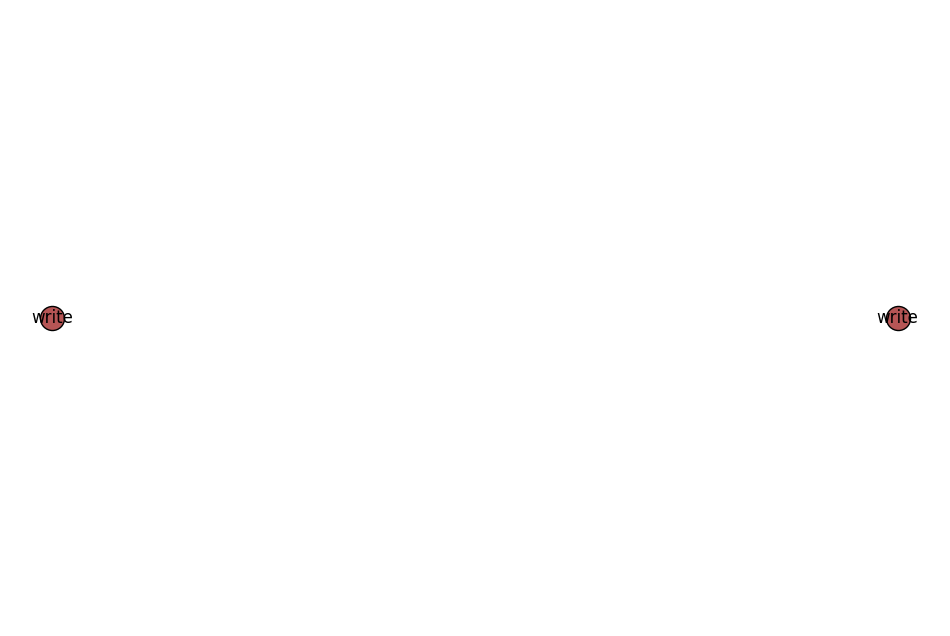

In [21]:
flow.draw_graph().show()

In [22]:
from jobflow import job, Flow, run_locally
from pathlib import Path

@job
def write(string):
    Path('file.txt').write_text(string)

job1 = write('Hello Michael')
job2 = write('Hello John')
flow = Flow([job1, job2])
run_locally(flow, create_folders=True)

2023-10-07 11:42:34,674 INFO Started executing jobs locally
2023-10-07 11:42:34,677 INFO Starting job - write (ebdc4ec6-f977-4202-9ec6-feee6e74472a)
2023-10-07 11:42:34,679 INFO Finished job - write (ebdc4ec6-f977-4202-9ec6-feee6e74472a)
2023-10-07 11:42:34,681 INFO Starting job - write (071b77cd-51b9-4d22-9b49-808e8f6e0958)
2023-10-07 11:42:34,682 INFO Finished job - write (071b77cd-51b9-4d22-9b49-808e8f6e0958)
2023-10-07 11:42:34,682 INFO Finished executing jobs locally


{'ebdc4ec6-f977-4202-9ec6-feee6e74472a': {1: Response(output=None, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False)},
 '071b77cd-51b9-4d22-9b49-808e8f6e0958': {1: Response(output=None, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False)}}

# dataclass

In [ ]:
class usual_Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

In [ ]:
usual_Person("John", 43)

In [ ]:
from dataclasses import dataclass

@dataclass
class Person:
    name: str
    age: int

In [ ]:
Person("John", 43)

# dataclass and serialization

In [ ]:
from monty.json import MSONable

class usual_Person(MSONable):
    def __init__(self, name, age):
        self.name = name
        self.age = age

p1 = usual_Person("Michael", 46)
p1_dict = p1.as_dict()
print(p1_dict)
p1_from_dict = usual_Person.from_dict(p1_dict)

In [ ]:
from dataclasses import dataclass
from monty.json import MSONable

@dataclass
class Person(MSONable):
    name: str
    age: int

p1 = Person("Michael", 46)
p1_dict = p1.as_dict()
print(p1_dict)
p1_from_dict = Person.from_dict(p1_dict)

# Monty

In [ ]:
from monty.json import MontyEncoder, MontyDecoder
from pymatgen.util.testing import PymatgenTest

si_struct = PymatgenTest().get_structure('Si')
sio2_struct = PymatgenTest().get_structure('SiO2')
srtio3_struct = PymatgenTest().get_structure('SrTiO3')

data = {"structures": [si_struct, sio2_struct],
        "out": [1, {"buried_struct": srtio3_struct}]}
print(data)
data_dict = MontyEncoder().encode(data)
decoder = MontyDecoder()
data_from_dict = MontyDecoder().decode(data_dict)
print(data_from_dict)

In [ ]:
from monty.serialization import dumpfn, loadfn
from pymatgen.util.testing import PymatgenTest

si_struct = PymatgenTest().get_structure('Si')
sio2_struct = PymatgenTest().get_structure('SiO2')
srtio3_struct = PymatgenTest().get_structure('SrTiO3')

data = {"structures": [si_struct, sio2_struct],
        "out": [1, {"buried_struct": srtio3_struct}]}
dumpfn(data, fn="data.json", indent=2)
data_from_file = loadfn(fn="data.json")
print(data_from_file)

In [ ]:
from jobflow import SETTINGS

store = SETTINGS.JOB_STORE
store.connect()

job_document = store.query_one({'metadata.mpid': 'mp-149'})
job_document['metadata']['reduced_formula'] = 'Si'

store.update(job_document)

# Fibonacci with *addition*

In [ ]:
from jobflow import Response, job, run_locally

@job
def fibonacci(smaller, larger, stop_point=55):
    total = smaller + larger

    if total > stop_point:
        return total

    new_job = fibonacci(larger, total, stop_point=stop_point)
    return Response(output=total, addition=new_job)

fibonacci_job = fibonacci(1, 1)

outputs = run_locally(fibonacci_job, create_folders=True)
print(outputs)

# Fibonacci with *replace*

In [ ]:
from jobflow import Response, job, run_locally

@job
def fibonacci(smaller, larger, stop_point=55):
    total = smaller + larger

    if total > stop_point:
        return total

    new_job = fibonacci(larger, total, stop_point=stop_point)
    return Response(output=total, addition=new_job)

fibonacci_job = fibonacci(1, 1)

outputs = run_locally(fibonacci_job, create_folders=True)
print(outputs)

# Increment Maker

In [ ]:
from dataclasses import dataclass
from jobflow import Maker, job
from monty.serialization import dumpfn

@dataclass
class IncrementMaker(Maker):
    name: str = "increment"
    increment: int = 1

    @job
    def make(self, a):
        return a + self.increment

maker = IncrementMaker()
print(maker)
dumpfn(maker, "maker.json", indent=2)

In [ ]:
maker = IncrementMaker(increment=10)
increment_job = maker.make(a=4)
print(increment_job)
outputs = run_locally(increment_job, create_folders=True)
print(outputs)